In [1]:
import pandas as pd
import xgboost as xgb
import numpy as np

/home/lzc/Common/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
spammer_order = "../data/spammer_order.csv"
feat_list = ['post_num', 'follower_num', 'followee_num', 'content_similar',
 'figure_jing', 'figure_url', 'figure_face', 'figure_RRT', 'figure_face_every',
 'figure_jing_every', 'figure_url_every', 'figure_url_single', 'figure_jing_single',
 'figure_at', 'figure_at_every', 'figure_at_single', 'average_repost', 'average_comm',
 'late_night_times', 'is_regular', 'shorttime_times', 'active_day_ratio', 'day_interval_variance',
 'day_in_variance', 'follow_ratio']

raw_file = pd.read_csv(spammer_order)
data = raw_file[feat_list]
target = raw_file[['is_spammer']]

In [3]:
data

,post_num,follower_num,followee_num,content_similar,figure_jing,figure_url,figure_face,figure_RRT,figure_face_every,figure_jing_every,...,figure_at_single,average_repost,average_comm,late_night_times,is_regular,shorttime_times,active_day_ratio,day_interval_variance,day_in_variance,follow_ratio
0,15809,84,235,6,0.168,0.124,0.000,0.319,0.000,0.200,...,0.065,0.005,0.005,0.000,1,9,1.000,0.174,0.151,2.79762
1,11248,595,1533,40,0.011,1.000,0.000,0.000,0.000,0.011,...,0.000,0.000,0.000,1.000,1,1,0.933,0.094,0.082,2.57647
2,10069,450,1909,179,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,1.000,0.938,1,2,0.941,0.163,0.077,4.24222
3,8078,168,1907,38,0.000,0.173,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1,1,0.857,0.043,0.099,11.35119
4,7389,173,1933,114,0.000,1.000,0.022,0.000,0.022,0.000,...,0.000,0.004,0.000,0.875,1,2,0.889,0.202,0.057,11.17341
5,6462,373,1144,7,0.138,0.122,0.021,0.213,0.053,0.213,...,0.225,0.324,0.218,0.300,1,4,0.909,0.182,0.141,3.06702
6,6215,146,308,0,0.246,0.324,0.000,0.078,0.000,0.279,...,0.074,0.363,0.095,0.000,1,3,0.800,0.104,0.345,2.10959
7,6121,1172,1764,177,0.000,1.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1,1,0.667,0.259,0.164,1.50512
8,4836,528,931,44,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.857,1,1,1.000,0.066,0.096,1.76326
9,4807,467,663,42,0.012,1.000,0.000,0.000,0.000,0.012,...,0.000,0.000,0.000,0.870,1,1,0.920,0.067,0.109,1.41970


In [4]:
# split to train and test sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(
    data, target, test_size=0.33, random_state=0)

In [5]:
train_X = train_X.as_matrix()
test_X = test_X.as_matrix()
train_y = train_y.as_matrix()

In [6]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
gbm.fit(train_X, train_y)
predictions = gbm.predict(test_X)

/home/lzc/Common/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:112: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lzc/Common/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:147: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.71%


In [8]:
# or use 10 fold cross validation
from sklearn.model_selection import cross_val_score
model = xgb.XGBClassifier()

# from sklearn.model_selection import KFold
# kfold = KFold(n_splits=7)

from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

results = cross_val_score(model, data, target, cv=cv)
print results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# initial mean accuracy 48.54%, deviation 31.44%

[ 0.86601942  0.87572816  0.88932039]
Accuracy: 87.70% (0.96%)


## start adjusting the xgboost model parameters

In [9]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit
    

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [10]:
data = pd.read_csv('spammer_order.csv')

In [11]:
data.shape

(1716, 33)

In [12]:
feat_list = ['post_num', 'follower_num', 'followee_num', 'content_similar',
 'figure_jing', 'figure_url', 'figure_face', 'figure_RRT', 'figure_face_every',
 'figure_jing_every', 'figure_url_every', 'figure_url_single', 'figure_jing_single',
 'figure_at', 'figure_at_every', 'figure_at_single', 'average_repost', 'average_comm',
 'late_night_times', 'is_regular', 'shorttime_times', 'active_day_ratio', 'day_interval_variance',
 'day_in_variance', 'follow_ratio']
target='is_spammer'

In [13]:
data[target] = data[target].map(dict(yes=1, no=0))
data[target].value_counts()

1    858
0    858
Name: is_spammer, dtype: int64

In [35]:
def modelfit(alg, dtrain, cv_folds=5, early_stopping_rounds=50):
    
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(dtrain[feat_list].values, label=dtrain[target].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds)
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[feat_list], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[feat_list])
    dtrain_predprob = alg.predict_proba(dtrain[feat_list])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    

In [49]:
def cross_val(alg, data):
#     kfold = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
    kfold = KFold(n_splits=10, random_state=0)
    train = data[feat_list]
    res = data[target]
    scoring = ['accuracy', 'recall']
    results = cross_val_score(alg, train, res, cv=kfold, scoring='accuracy')
    print results
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    # initial mean accuracy 48.54%, deviation 31.44%

## 1. Find the number of estimators for a high learning rate

In [50]:
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

# from sklearn import svm
# clf = svm.SVC()
# cross_val(clf, data)

modelfit(xgb1, data)

# cross_val(xgb1, data)

[ 0.          0.          0.          0.          0.01162791  0.          0.
  0.          0.          0.        ]
Accuracy: 0.12% (0.35%)


In [61]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

from sklearn.model_selection import ShuffleSplit
shuffle = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=True, cv=shuffle)
gsearch1.fit(data[feat_list],data[target])

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.3, train_size=None),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [62]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/home/lzc/Common/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.94591, std: 0.00212, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.94554, std: 0.00283, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.94417, std: 0.00271, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.94577, std: 0.00338, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.94720, std: 0.00183, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.94416, std: 0.00354, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.94839, std: 0.00154, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.94558, std: 0.00106, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.94524, std: 0.00083, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.94772, std: 0.00051, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.94604, std: 0.00183, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.94419, std: 0.00188, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 1

In [97]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test2 = {
    'max_depth':[6,7,8],
    'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(data[feat_list],data[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [6, 7, 8], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [98]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.76303, std: 0.11195, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.77081, std: 0.09711, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.77529, std: 0.09582, params: {'max_depth': 6, 'min_child_weight': 6},
  mean: 0.75858, std: 0.10624, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.77117, std: 0.10915, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.78041, std: 0.09736, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: 0.75987, std: 0.10989, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.76625, std: 0.10350, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.76502, std: 0.10417, params: {'max_depth': 8, 'min_child_weight': 6}],
 {'max_depth': 7, 'min_child_weight': 6},
 0.7804123012412337)

In [105]:
param_test2b = {
    'min_child_weight':[6,8,10,12, 14, 16]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=7,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(data[feat_list],data[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=2, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [6, 8, 10, 12, 14, 16]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [106]:
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: 0.78041, std: 0.09736, params: {'min_child_weight': 6},
  mean: 0.78582, std: 0.09375, params: {'min_child_weight': 8},
  mean: 0.79661, std: 0.07896, params: {'min_child_weight': 10},
  mean: 0.80972, std: 0.06539, params: {'min_child_weight': 12},
  mean: 0.82104, std: 0.04935, params: {'min_child_weight': 14},
  mean: 0.83822, std: 0.04270, params: {'min_child_weight': 16}],
 {'min_child_weight': 16},
 0.8382241428808677)

In [111]:
param_test2c = {
    'min_child_weight':[16, 20, 24, 28, 32, 36, 40]
}
gsearch2c = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=7,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2c, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2c.fit(data[feat_list],data[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=2, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_child_weight': [16, 20, 24, 28, 32, 36, 40]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [112]:
gsearch2c.grid_scores_, gsearch2c.best_params_, gsearch2c.best_score_

([mean: 0.83822, std: 0.04270, params: {'min_child_weight': 16},
  mean: 0.85044, std: 0.03144, params: {'min_child_weight': 20},
  mean: 0.86194, std: 0.03041, params: {'min_child_weight': 24},
  mean: 0.86878, std: 0.03064, params: {'min_child_weight': 28},
  mean: 0.87156, std: 0.02665, params: {'min_child_weight': 32},
  mean: 0.87476, std: 0.02708, params: {'min_child_weight': 36},
  mean: 0.87476, std: 0.02559, params: {'min_child_weight': 40}],
 {'min_child_weight': 36},
 0.8747646590430703)

In [113]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test3 = {
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
                                        min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(data[feat_list],data[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=140, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [114]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.76872, std: 0.10037, params: {'gamma': 0.0},
  mean: 0.77219, std: 0.10086, params: {'gamma': 0.1},
  mean: 0.76760, std: 0.10067, params: {'gamma': 0.2},
  mean: 0.76590, std: 0.10160, params: {'gamma': 0.3},
  mean: 0.76757, std: 0.10231, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.7721892820668668)

In [31]:
xgb2 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=7,
        min_child_weight=36,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
# modelfit(xgb2, data)
cross_val(xgb2, data)

[ 0.81941748  0.86990291  0.82330097]
Accuracy: 83.75% (2.29%)


### Tune subsample and colsample_bytree

In [121]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test4 = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=7,
                                        min_child_weight=36, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(data[feat_list],data[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=36, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [122]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.86950, std: 0.02939, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.86900, std: 0.03143, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.86873, std: 0.03514, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.86805, std: 0.03126, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.86560, std: 0.03055, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.86970, std: 0.02942, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.87064, std: 0.03040, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.86570, std: 0.03226, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.87144, std: 0.02966, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.87274, std: 0.02856, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.86649, std: 0.02999, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.86459, std: 0.03378, params: {'subsample': 0.9, 'colsample_bytree'

### regularization

In [124]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test6 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=7,
                                        min_child_weight=36, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(data[feat_list],data[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=36, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [125]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.86649, std: 0.02999, params: {'reg_alpha': 1e-05},
  mean: 0.86819, std: 0.03117, params: {'reg_alpha': 0.01},
  mean: 0.86591, std: 0.02962, params: {'reg_alpha': 0.1},
  mean: 0.86758, std: 0.02934, params: {'reg_alpha': 1},
  mean: 0.85370, std: 0.02755, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.01},
 0.8681899913493742)

In [128]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test7 = {
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=7,
                                        min_child_weight=36, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(data[feat_list],data[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=36, missing=None, n_estimators=177, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [129]:
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

([mean: 0.86649, std: 0.02999, params: {'reg_alpha': 0},
  mean: 0.86650, std: 0.02999, params: {'reg_alpha': 0.001},
  mean: 0.86790, std: 0.03099, params: {'reg_alpha': 0.005},
  mean: 0.86819, std: 0.03117, params: {'reg_alpha': 0.01},
  mean: 0.86789, std: 0.03002, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.01},
 0.8681899913493742)


Model Report
Accuracy : 0.8741
AUC Score (Train): 0.950296


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

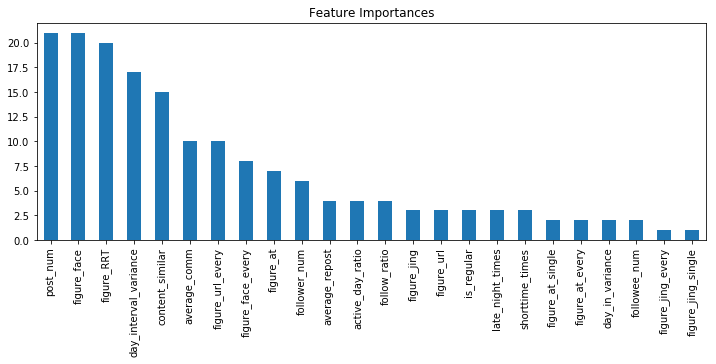

In [28]:
xgb3 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=7,
        min_child_weight=36,
        gamma=0.1,
        subsample=0.7,
        colsample_bytree=0.8,
        reg_alpha=0.01,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb3, data)

In [29]:
cross_val(xgb3, data)

[ 0.78682171  0.85130112  0.77777778]
Accuracy: 80.53% (3.27%)
